In [1]:
import os
import librosa
import librosa.display
from librosa import feature

import numpy as np
from numpy import *
from numpy import vstack,array
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import seaborn as sns
import pandas as pd
import scipy
import scipy.cluster.hierarchy as sch
from pandas import plotting
from scipy.cluster.vq import vq,kmeans,whiten

In [7]:
wavefiledir = "./NewData/"
wavenamelist = os.listdir(wavefiledir)

In [3]:
wavenamelist[34]#[0:-4]

'BsurpriseC05.WAV'

In [4]:
data = pd.read_csv('wave1.csv',header=0,names = ['filename','speakerID','emotion','language','grade'])
print(data.shape)
data.head()

(230, 5)


,filename,speakerID,emotion,language,grade
0,LsurpriseE03,L,surprise,E,3
1,LsurpriseC05,L,surprise,C,5
2,AangerC05,A,anger,C,5
3,PfearJ04,P,fear,J,4
4,LangerJ04,L,anger,J,4


In [5]:
def get_mfcc(filename):
    y, sr = librosa.load(wavefiledir+filename+'.WAV',sr=None)
    get_feature = librosa.feature.mfcc(librosa.power_to_db(y))
    return get_feature

In [6]:
data['MFCC']=data.filename.apply(lambda x:get_mfcc(x))

In [8]:
for item in data[30:35]:
    arr=data.MFCC
    print(arr.shape)

(230,)
(230,)
(230,)
(230,)
(230,)
(230,)


In [9]:
mfcc = data['MFCC']
res = []
x = [mfcc[0].flatten()]
for i in range(1, len(mfcc)):
    y = mfcc[i].flatten()
    x = np.append(x, [y], axis=0)

x.shape

(230, 78140)

In [10]:
data['MFCC'] = x.tolist()
data.head()

,filename,speakerID,emotion,language,grade,MFCC
0,LsurpriseE03,L,surprise,E,3,"[513.1813354492188, 517.314208984375, 517.4269..."
1,LsurpriseC05,L,surprise,C,5,"[-54.19148635864258, -54.19148635864258, -54.1..."
2,AangerC05,A,anger,C,5,"[-52.68820571899414, -52.68820571899414, -52.6..."
3,PfearJ04,P,fear,J,4,"[509.6606750488281, 517.299072265625, 521.8084..."
4,LangerJ04,L,anger,J,4,"[-53.33030319213867, -53.33030319213867, -53.3..."


In [11]:
data['MFCC']

0      [513.1813354492188, 517.314208984375, 517.4269...
1      [-54.19148635864258, -54.19148635864258, -54.1...
2      [-52.68820571899414, -52.68820571899414, -52.6...
3      [509.6606750488281, 517.299072265625, 521.8084...
4      [-53.33030319213867, -53.33030319213867, -53.3...
                             ...                        
225    [-51.64280700683594, -51.64280700683594, -51.6...
226    [517.0995483398438, 518.1492309570312, 519.497...
227    [-52.97903823852539, -52.97903823852539, -52.9...
228    [510.7218933105469, 518.8019409179688, 500.889...
229    [-53.698909759521484, -53.698909759521484, -53...
Name: MFCC, Length: 230, dtype: object

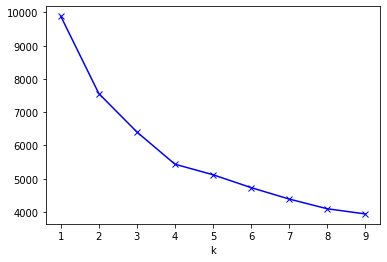

In [32]:
X=x
K = range(1, 10)
mean_distortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    mean_distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, metric='euclidean'), axis=1))/ X.shape[0])
plt.plot(K, mean_distortions, 'bx-')
plt.xlabel('k')
#font = FontProperties(fname=r'c:\windows\fonts\msyh.ttc', size=20)
#plt.ylabel(u'平均畸变程度', fontproperties=font)
#plt.title(u'用肘部法确定最佳的K值', fontproperties=font)
plt.show()

In [33]:
def getXY(dataSet):
    import numpy as np
    m = 230  # 数据集的行
    X = []
    Y = []
    for i in range(0,3):
        X.append(dataSet[i,0])
        Y.append(dataSet[i,1])
    return np.array(X), np.array(Y)

In [34]:
from sklearn.cluster import KMeans
X=x
k = 4
mean_distortions = []
kmeans = KMeans(n_clusters=k, random_state=10).fit(X)
labels = kmeans.labels_

In [ ]:
estimator = KMeans(n_clusters=4)#构造聚类器，构造一个聚类数为n 的聚类器
estimator.fit(data)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和
mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']#这里'or'代表中的'o'代表画圈，'r'代表颜色为红色，后面的依次类推
color = 0
j = 0 
for i in label_pred:
    plt.plot([data[j:j+1,0]], [data[j:j+1,1]], mark[i], markersize = 5)
    j +=1
plt.show() 

In [9]:
#color_codes = {0:'#00FF00', 1:'#FF0000', 2:'#0000FF', 3:'#00FFFF'}

In [10]:
#colors = [color_codes[n] for n in labels]

In [35]:
data['labels'] = labels

In [36]:
data.head()

,filename,speakerID,emotion,language,grade,MFCC,labels
0,LsurpriseE03,L,surprise,E,3,"[513.1813354492188, 517.314208984375, 517.4269...",1
1,LsurpriseC05,L,surprise,C,5,"[-54.19148635864258, -54.19148635864258, -54.1...",3
2,AangerC05,A,anger,C,5,"[-52.68820571899414, -52.68820571899414, -52.6...",0
3,PfearJ04,P,fear,J,4,"[509.6606750488281, 517.299072265625, 521.8084...",0
4,LangerJ04,L,anger,J,4,"[-53.33030319213867, -53.33030319213867, -53.3...",1


In [37]:
keep_columns = ['filename', 'speakerID', 'emotion', 'language', 'grade','labels']

In [38]:
label = data[keep_columns]

In [39]:
label.head()

,filename,speakerID,emotion,language,grade,labels
0,LsurpriseE03,L,surprise,E,3,1
1,LsurpriseC05,L,surprise,C,5,3
2,AangerC05,A,anger,C,5,0
3,PfearJ04,P,fear,J,4,0
4,LangerJ04,L,anger,J,4,1


In [40]:
label.to_csv('label_4.csv',index=False)